# Preprocessing And Feature Engineering
---

## Import Library

In [1]:
# Basic library
import pandas as pd

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/junkai/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load Cleaned Data

Load `clean.csv`, `sp500.csv`, `sp1000.csv` and `sp400.csv` from `data` folder into a pandas DataFrame.

In [2]:
df = pd.read_csv('../data/clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4933 entries, 0 to 4932
Data columns (total 43 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   security                                                                          4933 non-null   object 
 1   year                                                                              4933 non-null   float64
 2   Cash And Cash Equivalents At Carrying Value                                       4933 non-null   float64
 3   Income Tax Expense Benefit                                                        4933 non-null   float64
 4   Stockholders Equity                                                               4933 non-null   float64
 5   Weighted Average Number Of Shares Outstanding Basic                               4933 non-null   float64
 6   

In [3]:
df.drop(columns='Document Period End Date', inplace=True)

In [4]:
sp500 = pd.read_csv('../data/sp500.csv')
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ticker    505 non-null    object
 1   security  505 non-null    object
 2   sector    505 non-null    object
 3   cik       505 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 15.9+ KB


In [5]:
sp1000 = pd.read_csv('../data/sp1000.csv')
sp1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ticker    1000 non-null   object 
 1   security  1000 non-null   object 
 2   sector    999 non-null    object 
 3   cik       999 non-null    float64
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


In [6]:
sp400 = pd.read_csv('../data/sp400.csv')
sp400.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ticker    400 non-null    object
 1   security  400 non-null    object
dtypes: object(2)
memory usage: 6.4+ KB


---

In [7]:
sp400.drop(columns='security', inplace=True)
sp500['cap'] = 'large-cap'
sp400['cap'] = 'mid-cap'

In [8]:
sp1000 = pd.merge(sp1000, sp400, on='ticker', how='left')
sp1000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ticker    1000 non-null   object 
 1   security  1000 non-null   object 
 2   sector    999 non-null    object 
 3   cik       999 non-null    float64
 4   cap       373 non-null    object 
dtypes: float64(1), object(4)
memory usage: 46.9+ KB


In [9]:
sp1500 = pd.concat((sp500, sp1000)).reset_index(drop=True)
sp1500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ticker    1505 non-null   object 
 1   security  1505 non-null   object 
 2   sector    1504 non-null   object 
 3   cik       1504 non-null   float64
 4   cap       878 non-null    object 
dtypes: float64(1), object(4)
memory usage: 58.9+ KB


In [10]:
sp1500.drop(columns=['ticker', 'cik'], inplace=True)
sp1500['cap'] = sp1500['cap'].fillna('small-cap')
sp1500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   security  1505 non-null   object
 1   sector    1504 non-null   object
 2   cap       1505 non-null   object
dtypes: object(3)
memory usage: 35.4+ KB


---

In [11]:
df = pd.merge(df, sp1500, on='security')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4969 entries, 0 to 4968
Data columns (total 44 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   security                                                                          4969 non-null   object 
 1   year                                                                              4969 non-null   float64
 2   Cash And Cash Equivalents At Carrying Value                                       4969 non-null   float64
 3   Income Tax Expense Benefit                                                        4969 non-null   float64
 4   Stockholders Equity                                                               4969 non-null   float64
 5   Weighted Average Number Of Shares Outstanding Basic                               4969 non-null   float64
 6   

---

## Plotting And Interpreting Data

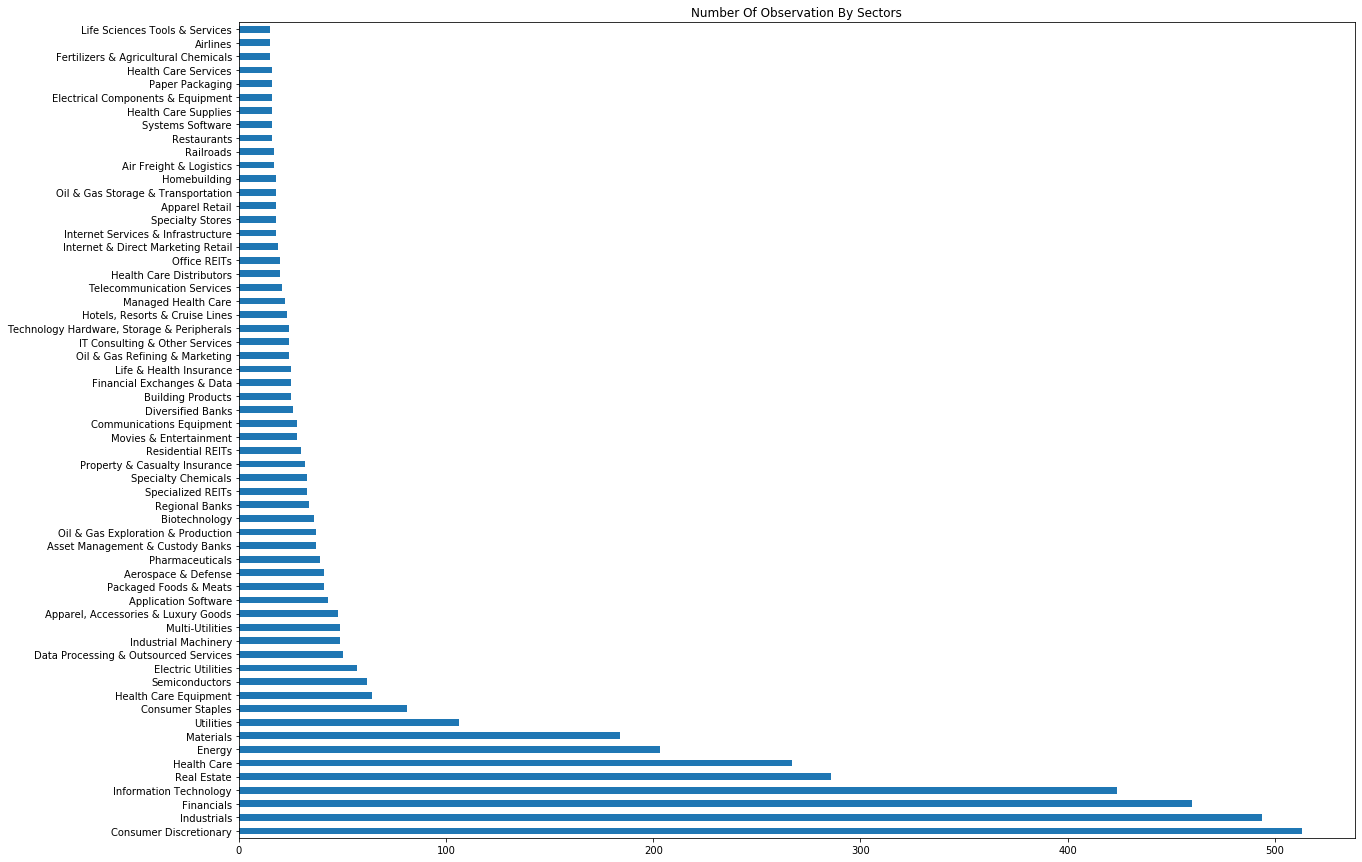

In [12]:
df['sector'].value_counts()[:60].plot.barh(
    figsize=(20, 15),
    title='Number Of Observation By Sectors'
);

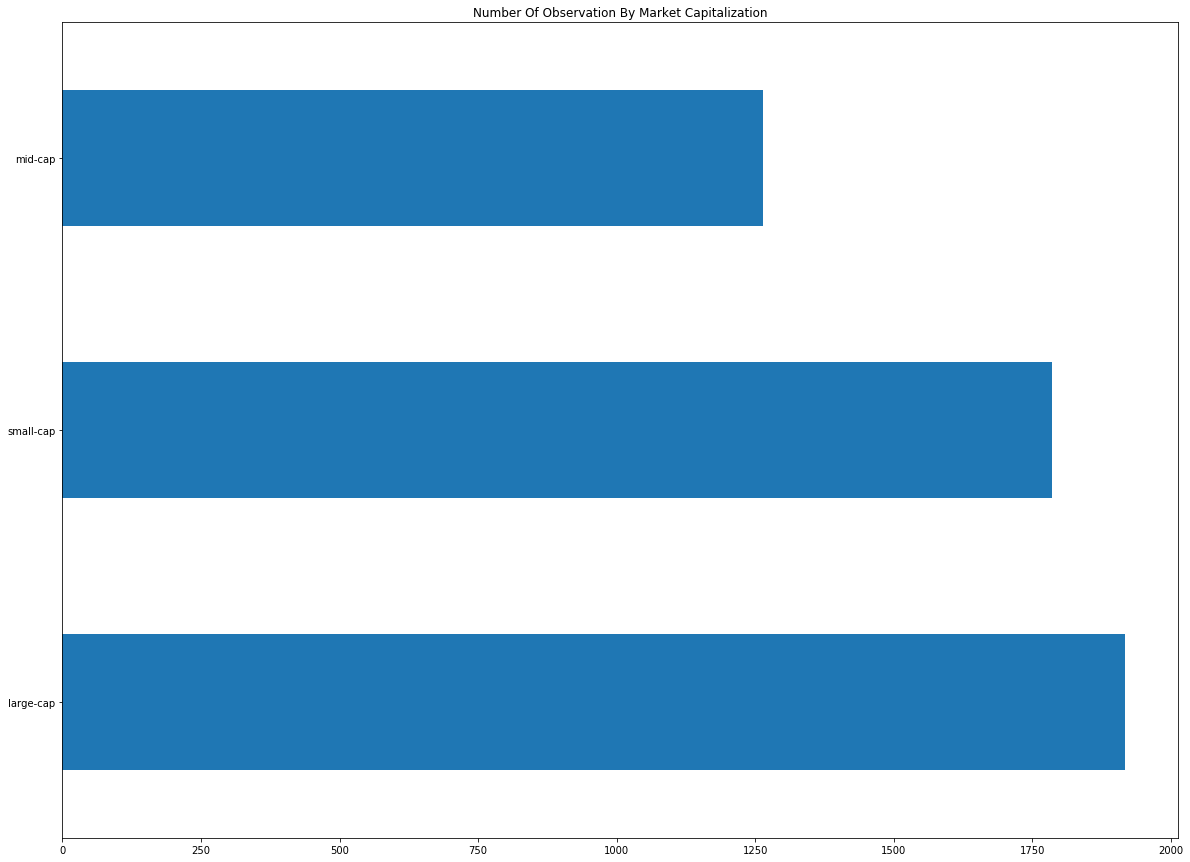

In [13]:
df['cap'].value_counts().plot.barh(
    figsize=(20, 15),
    title='Number Of Observation By Market Capitalization'
);

---

## Distribution Of Values By Features

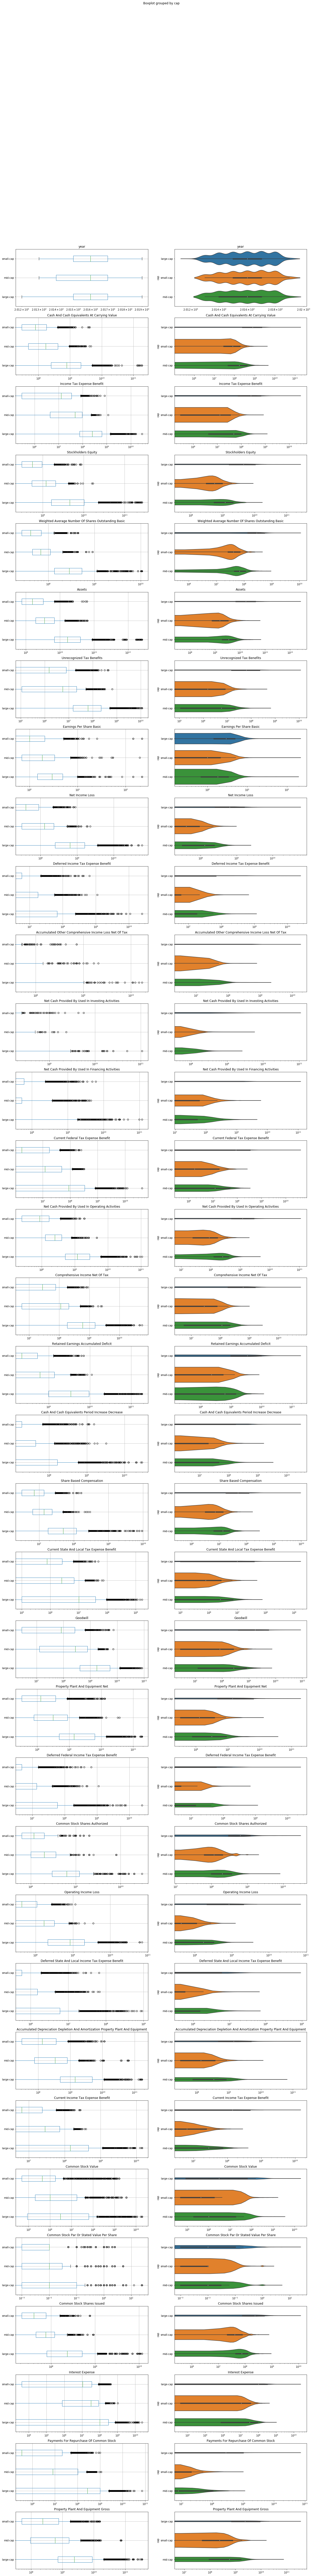

In [14]:
float_features = [f for f in df.columns if df[f].dtypes == 'float64']
ncols = 2
nrows = len(float_features)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows))
for n, float_f in enumerate(float_features):
    df.boxplot(column=float_f, by='cap', ax=ax[n, 0], vert=False)
    ax[n, 0].set_title(float_f)
    ax[n, 0].set_xlabel('')
    ax[n, 0].set_xscale('log')
    
    sns.violinplot(x=float_f, y='cap', data=df, ax=ax[n, 1])
    ax[n, 1].set_title(float_f)
    ax[n, 1].set_xlabel('')
    ax[n, 1].set_xscale('log')

---

## Baseline Accuracy

The baseline accuracy is the percentage of the majority class, regardless of whether it is `large-cap`, `mid-cap` or `small-cap`. It serves as the benchmark for our model to beat.

In [15]:
df['cap'].value_counts(normalize=True)

large-cap    0.385993
small-cap    0.359428
mid-cap      0.254578
Name: cap, dtype: float64

---

## Export To `csv` Before Preprocessing

In [16]:
df.to_csv('../data/to_preprocess.csv', index=False)

---

In [17]:
df['cap'] = df['cap'].map({'large-cap': 0, 'mid-cap': 1, 'small-cap': 2})
df['Amendment Flag'] = df['Amendment Flag'].astype(int)
df['Entity Current Reporting Status'] = df['Entity Current Reporting Status'].map({'Yes': 1, 'No': 0})
df['Entity Voluntary Filers'] = df['Entity Voluntary Filers'].map({'Yes': 1, 'No': 0})
df['Entity Well Known Seasoned Issuer'] = df['Entity Well Known Seasoned Issuer'].map({'Yes': 1, 'No': 0})

df = pd.get_dummies(df, columns=[
    'Document Fiscal Period Focus',
    'Document Type',
    'Entity Filer Category',
    'sector'
])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4969 entries, 0 to 4968
Columns: 172 entries, security to sector_Wireless Telecommunication Services
dtypes: float64(34), int64(5), object(1), uint8(132)
memory usage: 2.3+ MB


---

## Export To `csv` After Preprocessing

In [18]:
df.to_csv('../data/preprocessed.csv', index=False)